In [1]:
import itertools
from collections import namedtuple

from algorithm import run_more_plots, accuracy

from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
def get_labels(X, y, tr, num_iters=40) -> [dict]:
    """
    Run our method and spectral clustering on inputs
    
    :param X: input data
    :param y: labels
    :returns: a list of dictionaries containing the predicted labels with
              2 keys: `our_labels`, `spectral_labels`
    """
    n_clusters = len(set(y))

    # normalize
    X = X - X.mean(0)
    X = X / X.std(0)
    
    alphas = [0.01, 0.1, 0.5, 1, 5]
    lambda_lassos = [0.01, 0.1, 0.5, 1, 5]

    outs = []
    for alpha, lambda_lasso in itertools.product(alphas, lambda_lassos):
        out = run_more_plots(X, y, num_iters, alpha, lambda_lasso, tr, n_clusters=n_clusters, plot=False, is_print=True, auto=False)
        out['alpha'] = alpha
        out['lambda_lasso'] = lambda_lasso
        outs.append(out)
    
    return outs

def get_performance(out, y, is_print=False) -> dict:
    """Get performance of one prediction"""

    our_nmi = normalized_mutual_info_score(y, out['our_labels'])
    our_acc = accuracy(y, out['our_labels'])
    our_ari = adjusted_rand_score(y, out['our_labels'])

    sp_nmi = normalized_mutual_info_score(y, out['spectral_labels'])
    sp_acc = accuracy(y, out['spectral_labels'])
    sp_ari = adjusted_rand_score(y, out['spectral_labels'])
    
    if is_print:
        print(f'our acc: {our_acc:.2f}, our nmi: {our_nmi:.2f}, our ari: {our_ari:.2f}, sp acc: {sp_acc:.2f}, sp nmi: {sp_nmi:.2f}, sp ari: {sp_ari:.2f}')
 
    performance = {
        'our_nmi': our_nmi,
        'our_acc': our_acc,
        'our_ari': our_ari,
        'sp_nmi': sp_nmi,
        'sp_acc': sp_acc,
        'sp_ari': sp_ari
    }
    
    return performance
    
    
def get_performances(outs, y, best=False, is_print=False) -> [dict]:
    """Print clustering performance metrics"""
    
    performances = None
    
    # if best==True pick the one with hieghst nmi
    if best:
        best_out = list(sorted(outs,
                               key=lambda out: normalized_mutual_info_score(y, out['our_labels']),
                               reverse=True
                              ))[0]
        performances = [get_performance(best_out, y, is_print)]
    else:
        performances = [get_performance(out, y) for out in outs]
    
    return performances


def plot_nmis(iters, our_nmis, sp_nmis) -> None:
    plt.plot(iters, our_nmis, marker='o', label='our method')
    plt.plot(iters, sp_nmis, marker='o', label='spectral method')
    plt.xticks(iters[::2])
    plt.xlabel('iteration')
    plt.ylabel('NMI')
    plt.legend()
    plt.show()
    
def plot_accs(iters, our_accs, sp_accs) -> None:
    plt.plot(iters, our_accs, marker='o', label='our method')
    plt.plot(iters, sp_accs, marker='o', label='spectral method')
    plt.xticks(iters[::2])
    plt.xlabel('iteration')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
def run_and_plot_iterations(X, y, tr=0.01) -> None:
    """Run our algorithm with different number of iterations and plot performances"""
    
    iters = list(range(1, 21))
    perfs = []

    for i in iters:
        outs = get_labels(X, y, tr=tr, num_iters=i)
        performance = get_performances(outs, y, best=True, is_print=False)[0]
        perfs.append(performance)

    our_nmis = [x['our_nmi'] for x in perfs]
    sp_nmis = [x['sp_nmi'] for x in perfs]
    plot_nmis(iters, our_nmis, sp_nmis)

    our_accs = [x['our_acc'] for x in perfs]
    sp_accs = [x['sp_acc'] for x in perfs]
    plot_accs(iters, our_accs, sp_accs)

## Iris dataset

"The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2"

|||
----|----
|# Instances | 150 |
|# Clusters | 3 | 
|# Attributes | 4 | 


In [9]:
X, y = datasets.load_iris(return_X_y=True)
X, y = shuffle(X, y, random_state=0)

treshold: 0.001


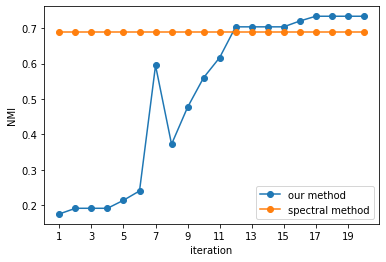

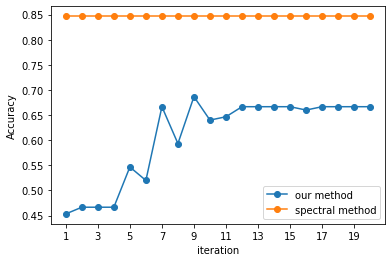

treshold: 0.01


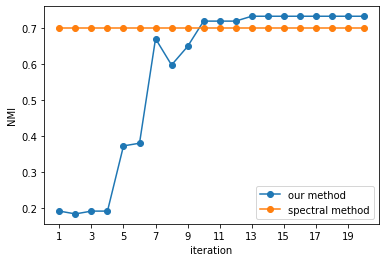

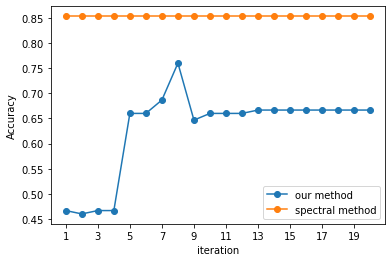

treshold: 0.1


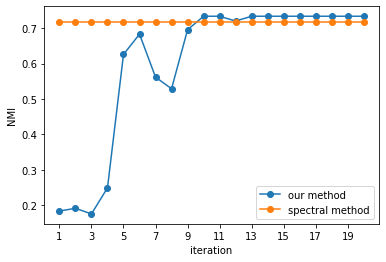

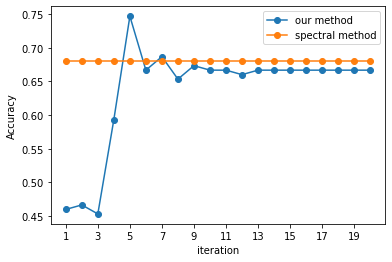

treshold: 0.2


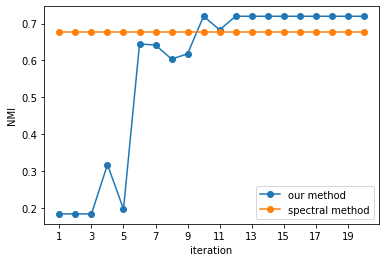

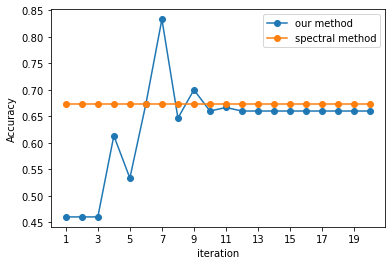

In [14]:
for tr in (0.001, 0.01, 0.1, 0.2):
    print('treshold: {}'.format(tr))
    run_and_plot_iterations(X, y, tr=tr)

## Wine dataset

"The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are thirteen different measurements taken for different constituents found in the three types of wine."

|||
----|----
|# Instances | 178 |
|# Clusters | 3 | 
|# Attributes | 13 | 

treshold: 0.001


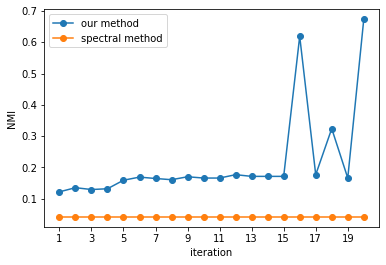

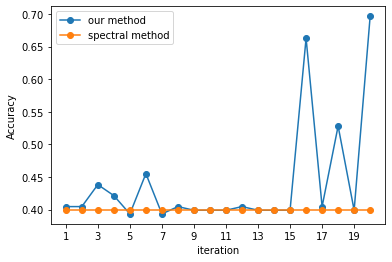

treshold: 0.01


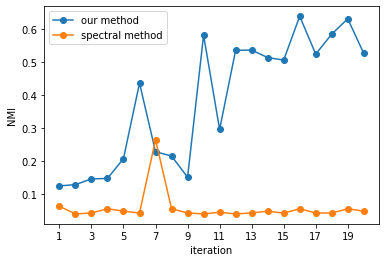

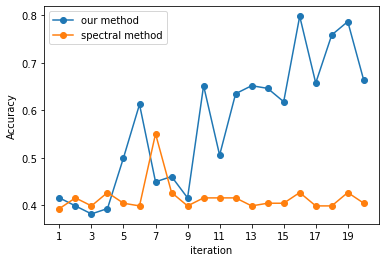

treshold: 0.1


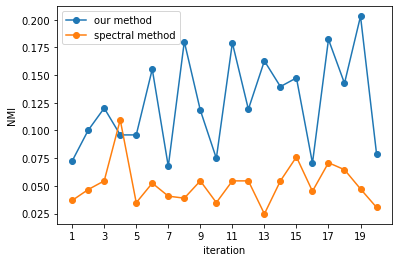

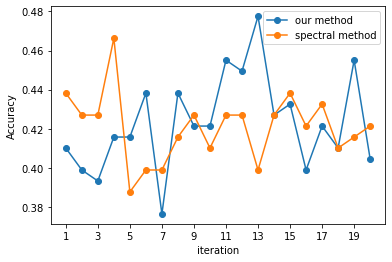

treshold: 0.2


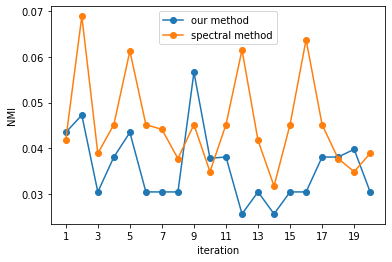

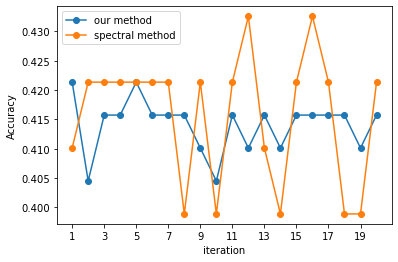

In [15]:
X, y = datasets.load_wine(return_X_y=True)
X, y = shuffle(X, y, random_state=0)
for tr in (0.001, 0.01, 0.1, 0.2):
    print('treshold: {}'.format(tr))
    run_and_plot_iterations(X, y, tr=tr)

## Chain link dataset

An artificial dataset.

|||
----|----
|# Instances | 1000 |
|# Clusters | 2 | 
|# Attributes | 3 | 

treshold: 0.001


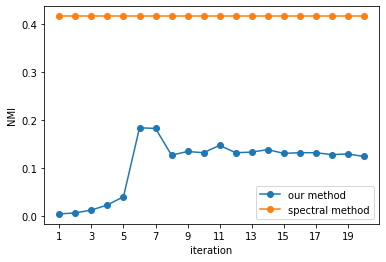

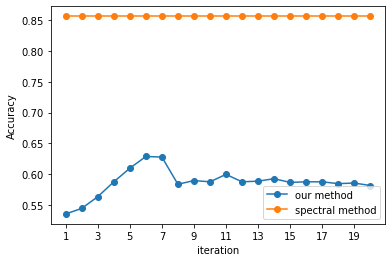

treshold: 0.01


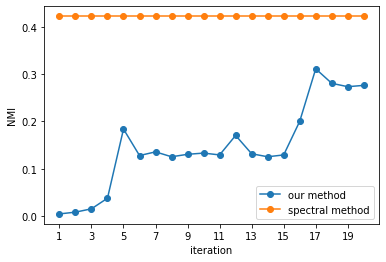

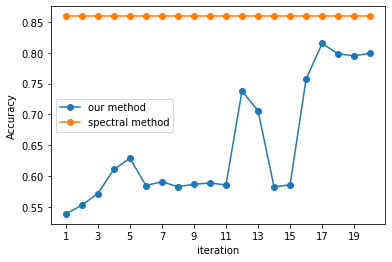

treshold: 0.1


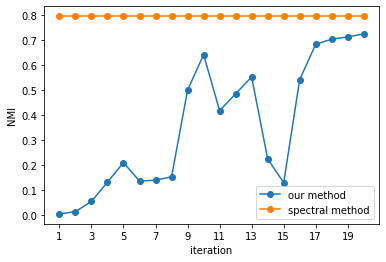

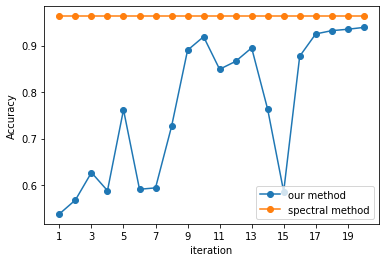

treshold: 0.2


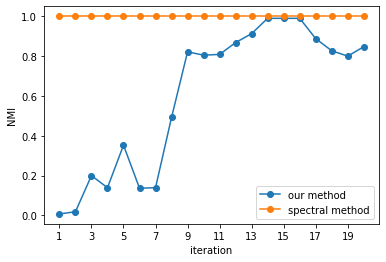

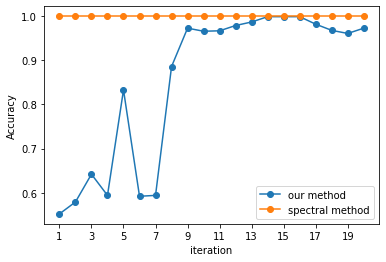

In [16]:
data = np.genfromtxt('data/chainlink.arff.txt', delimiter=',')
X = data[:, 0:3]
y = np.array(data[:, 3], dtype=int)
X, y = shuffle(X, y, random_state=0)
y -= 1

for tr in (0.001, 0.01, 0.1, 0.2):
    print('treshold: {}'.format(tr))
    run_and_plot_iterations(X, y, tr=tr)

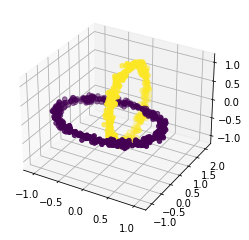

In [17]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=y)